In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('ds_salaries.csv')
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [3]:
df = df.drop('Unnamed: 0',axis='columns')

In [4]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [5]:
df.shape

(607, 11)

In [6]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 52.3+ KB


In [8]:
df['experience_level'].unique()

array(['MI', 'SE', 'EN', 'EX'], dtype=object)

In [9]:
df['experience_level'] = df['experience_level'].replace({'EN': 'Entry-level',
                                                        'MI': 'Mid-level',
                                                        'SE': 'Senior-level',
                                                        'EX': 'Executive-level'})

In [10]:
df['employment_type'] = df['employment_type'].replace({'FT': 'Full Time',
                                                       'PT': 'Part Time',
                                                       'CT': 'Contract',
                                                       'FL': 'Freelance'})

In [11]:
df.nunique()

work_year               3
experience_level        4
employment_type         4
job_title              50
salary                272
salary_currency        17
salary_in_usd         369
employee_residence     57
remote_ratio            3
company_location       50
company_size            3
dtype: int64

In [12]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,6.070000e+02,607.000000,607.00000
mean,2021.405272,3.240001e+05,112297.869852,70.92257
std,0.692133,1.544357e+06,70957.259411,40.70913
min,2020.000000,4.000000e+03,2859.000000,0.00000
25%,2021.000000,7.000000e+04,62726.000000,50.00000
50%,2022.000000,1.150000e+05,101570.000000,100.00000
75%,2022.000000,1.650000e+05,150000.000000,100.00000
max,2022.000000,3.040000e+07,600000.000000,100.00000


### EDA

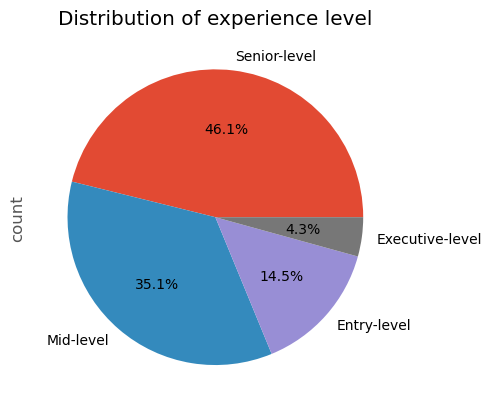

In [13]:
plt.style.use('ggplot')
df['experience_level'].value_counts().plot(kind = 'pie', autopct = '%.1f%%')
plt.title('Distribution of experience level')
plt.show()

,work_year,salary_in_usd
0,2020,95813
1,2021,99853
2,2022,124522


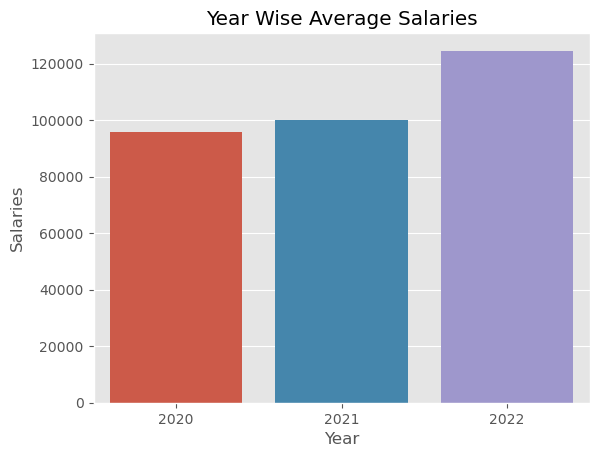

In [14]:
avg_sal = df.groupby('work_year').agg({'salary_in_usd' : 'mean'}).reset_index().astype(int)
display(avg_sal)
sns.barplot(data = avg_sal, x = 'work_year', y = 'salary_in_usd')
plt.xlabel('Year')
plt.ylabel('Salaries')
plt.title('Year Wise Average Salaries')
plt.show()

,experience_level,salary_in_usd
0,Entry-level,61643
1,Executive-level,199392
2,Mid-level,87996
3,Senior-level,138617


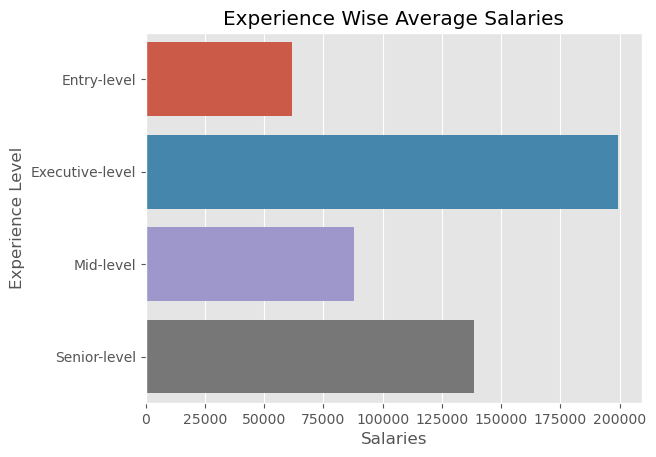

In [15]:
exp_avg_sal = df.groupby('experience_level').agg({'salary_in_usd' : 'mean'}).reset_index()
exp_avg_sal['salary_in_usd'] = exp_avg_sal['salary_in_usd'].astype(int)
display(exp_avg_sal)
sns.barplot(data = exp_avg_sal, y = 'experience_level', x = 'salary_in_usd')
plt.ylabel('Experience Level')
plt.xlabel('Salaries')
plt.title('Experience Wise Average Salaries')
plt.show()

,job_title,work_year,salary_in_usd
55,Financial Data Analyst,2021,450000.000000
28,Data Analytics Lead,2022,405000.000000
89,Principal Data Engineer,2021,328333.333333
50,Director of Data Science,2020,325000.000000
82,Machine Learning Scientist,2020,260000.000000
94,Research Scientist,2020,246000.000000
91,Principal Data Scientist,2021,239152.400000
6,Applied Data Scientist,2022,238000.000000
7,Applied Machine Learning Scientist,2021,230700.000000
52,Director of Data Science,2022,196979.000000


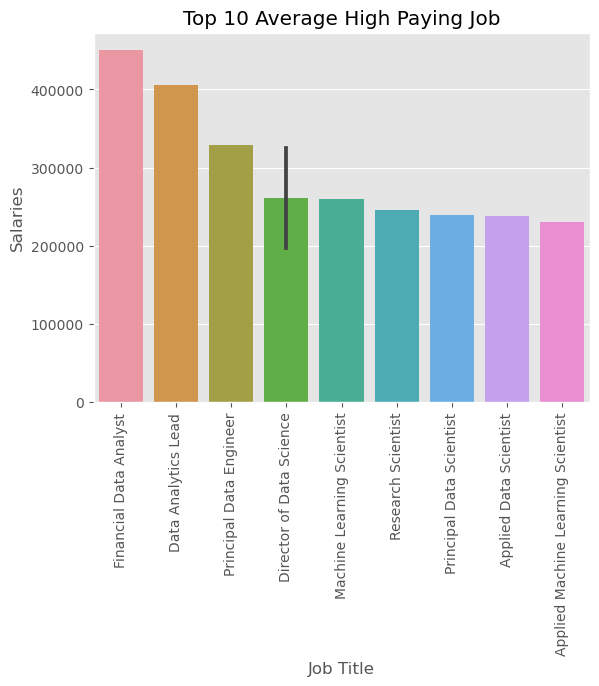

In [16]:
high_pay = df.groupby(['job_title','work_year']).agg({'salary_in_usd' : 'mean'}).reset_index()
high_pay = high_pay.nlargest(10,'salary_in_usd')
display(high_pay.sort_values(by = 'salary_in_usd',ascending = False))
sns.barplot(data = high_pay, x = 'job_title' , y = 'salary_in_usd')
plt.xticks(rotation = 90)
plt.xlabel('Job Title')
plt.ylabel('Salaries')
plt.title('Top 10 Average High Paying Job')
plt.show()

,job_title,work_year,salary_in_usd
0,3D Computer Vision Researcher,2021,5409.000000
93,Product Data Analyst,2020,13036.000000
70,ML Engineer,2020,15966.000000
27,Data Analytics Engineer,2022,20000.000000
72,ML Engineer,2022,21983.000000
19,Computer Vision Engineer,2021,23838.666667
2,AI Scientist,2021,24263.250000
13,Big Data Engineer,2021,24544.200000
86,NLP Engineer,2022,37236.000000
68,Lead Data Scientist,2021,40570.000000


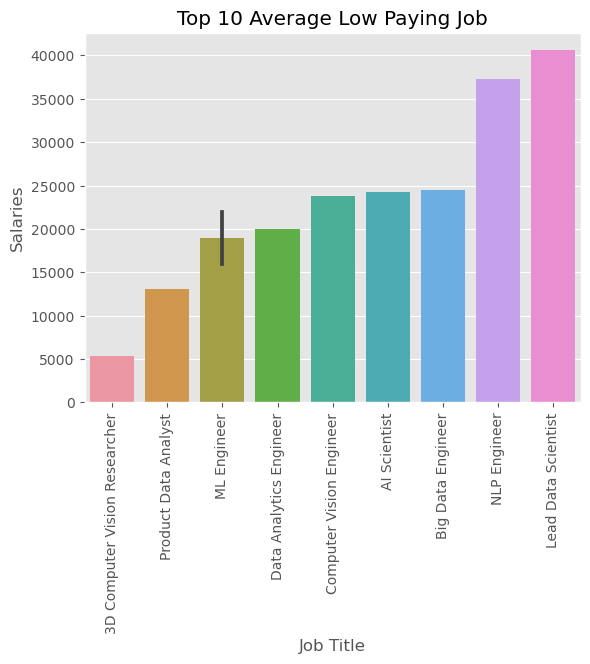

In [17]:
low_pay = df.groupby(['job_title','work_year']).agg({'salary_in_usd' : 'mean'}).reset_index()
low_pay = low_pay.nsmallest(10,'salary_in_usd')
display(low_pay.sort_values(by = 'salary_in_usd'))
sns.barplot(data = low_pay, x = 'job_title' , y = 'salary_in_usd')
plt.xticks(rotation = 90)
plt.xlabel('Job Title')
plt.ylabel('Salaries')
plt.title('Top 10 Average Low Paying Job')
plt.show()

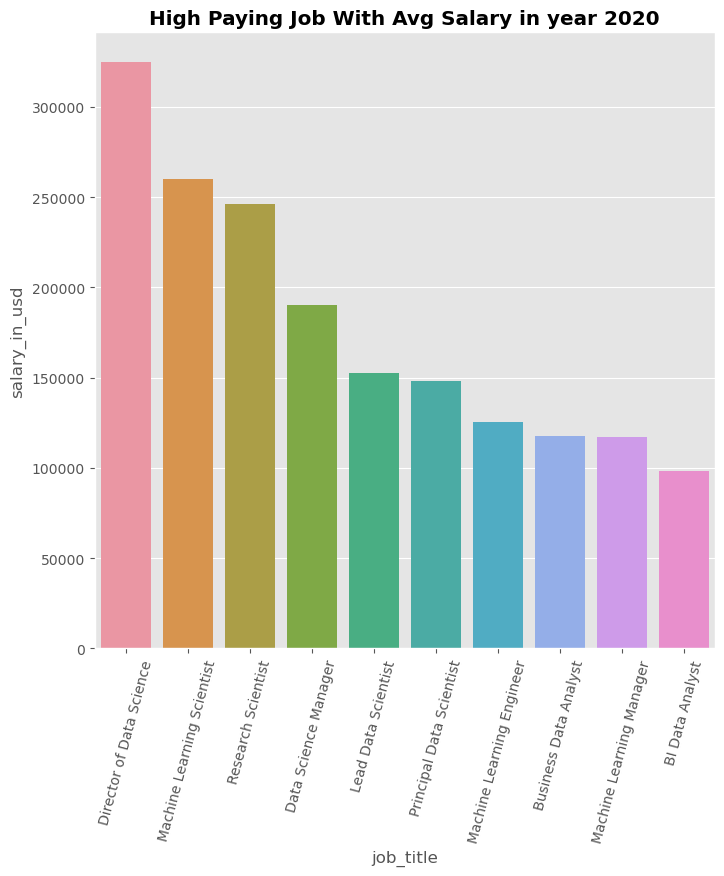

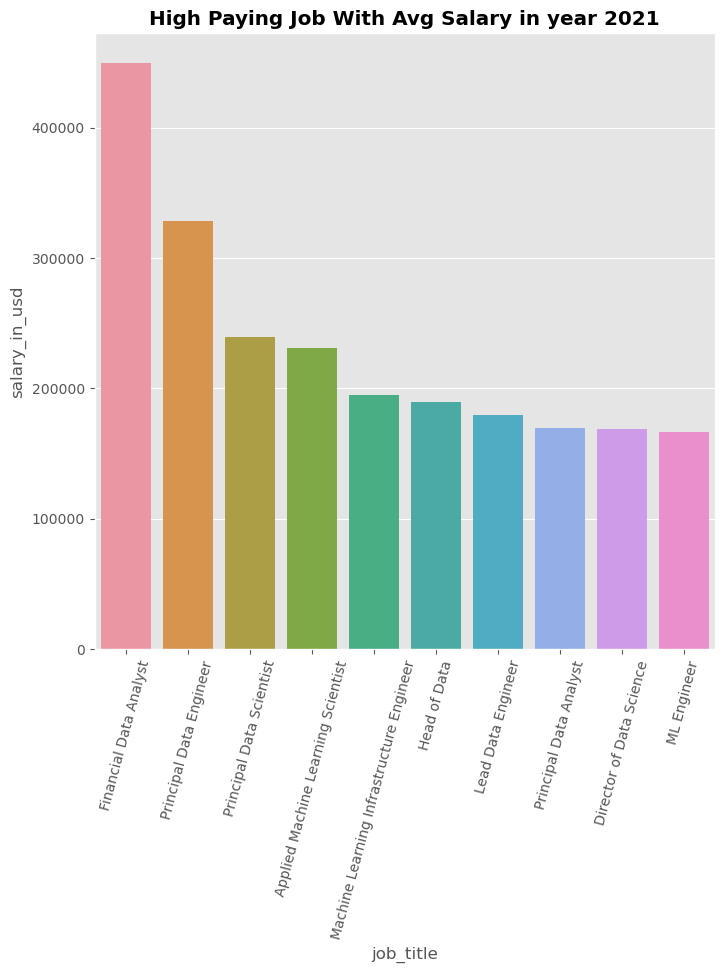

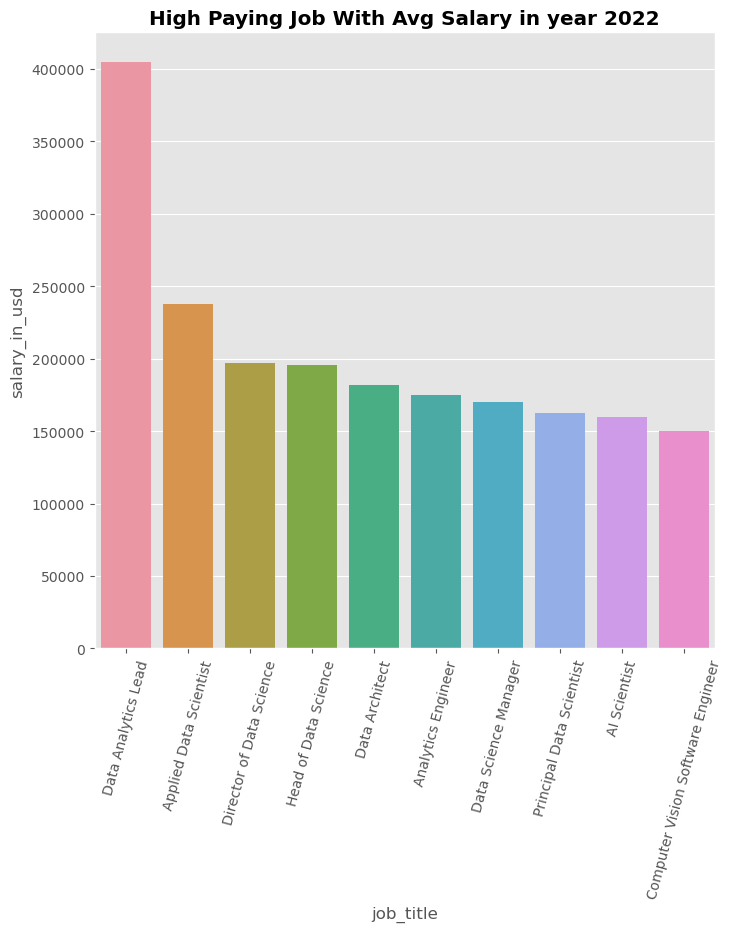

In [18]:
year = list(df['work_year'].unique())
for i in range(len(year)):
    filt_data = df[df['work_year'] == year[i]]
    data = filt_data.groupby(['work_year','job_title']).agg({'salary_in_usd' : 'mean'}).reset_index()
    data['salary_in_usd'] = data['salary_in_usd'].astype(int)
    data = data.nlargest(10,'salary_in_usd')
    
    plt.figure(figsize=(8,8))
    sns.barplot(data = data, x = 'job_title',y='salary_in_usd')
    plt.title(f'High Paying Job With Avg Salary in year {year[i]}',fontweight = 'bold')
    plt.xticks(rotation = 75)
    plt.show()

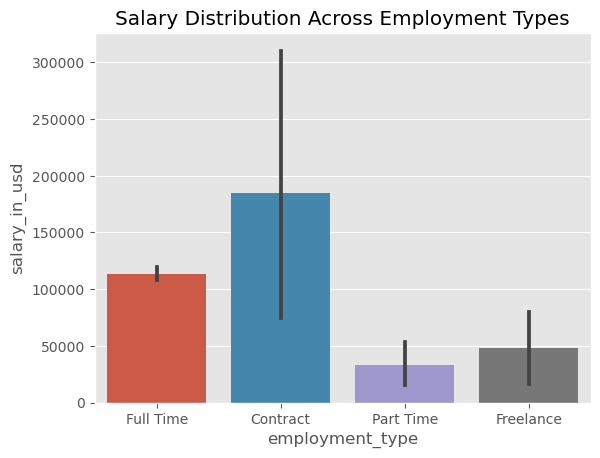

In [49]:
sns.barplot(data = df, x = 'employment_type',y='salary_in_usd')
plt.title('Salary Distribution Across Employment Types')
plt.show()

,job_title,employment_type,salary_in_usd
1,AI Scientist,Full Time,87789.800000
2,AI Scientist,Part Time,12000.000000
11,Computer Vision Engineer,Full Time,44476.750000
12,Computer Vision Engineer,Part Time,28609.000000
14,Data Analyst,Full Time,93752.843750
15,Data Analyst,Part Time,10354.000000
20,Data Engineer,Full Time,114224.821705
21,Data Engineer,Part Time,62349.000000
26,Data Scientist,Full Time,108922.792857
27,Data Scientist,Part Time,60834.500000


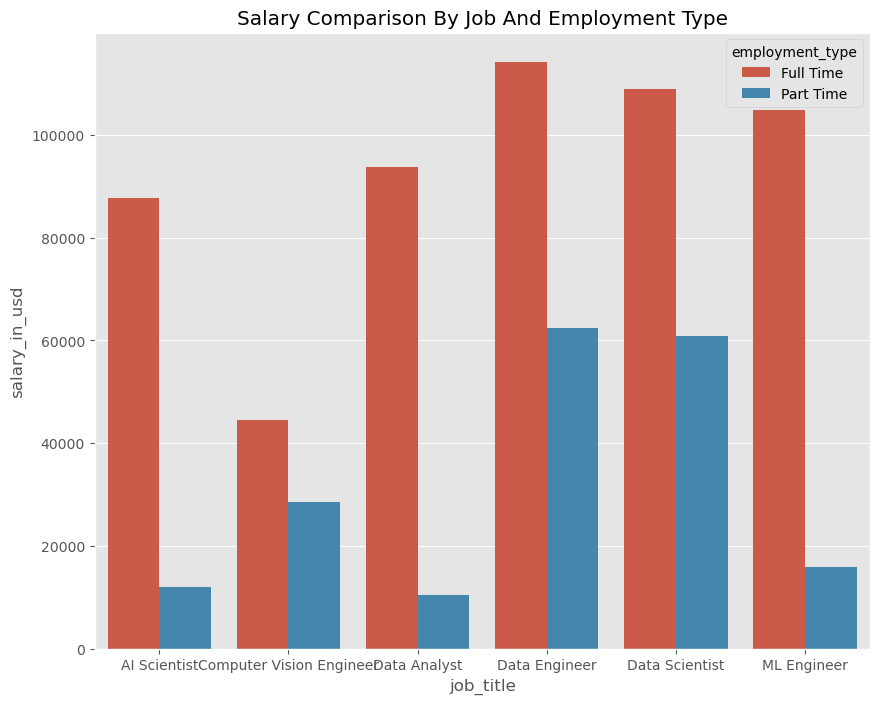

In [20]:
emp_type = df[df['employment_type'].isin(['Part Time','Full Time'])]
emp_type = emp_type.groupby(['job_title','employment_type']).agg({'salary_in_usd' : 'mean'}).reset_index()
data = emp_type['job_title'].value_counts()
data = data[data == 2].index.tolist()
emp_type = emp_type[emp_type['job_title'].isin(data)]
display(emp_type)
plt.figure(figsize=(10,8))
sns.barplot(data = emp_type, x = 'job_title', y='salary_in_usd', hue = 'employment_type')
plt.title('Salary Comparison By Job And Employment Type')
plt.show()

<Axes: xlabel='company_size', ylabel='count'>

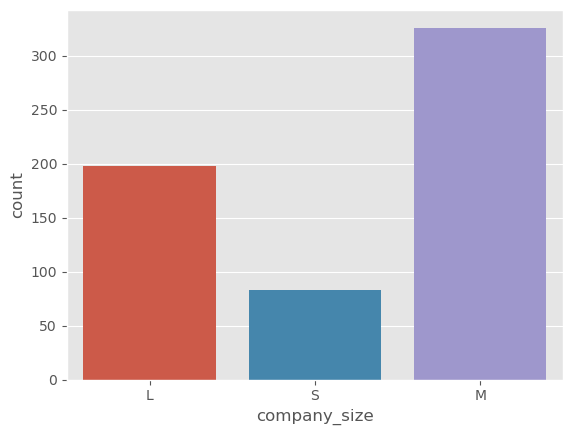

In [21]:
sns.countplot(data = df, x = 'company_size')

,company_size,salary_in_usd
0,L,119242
1,M,116905
2,S,77632


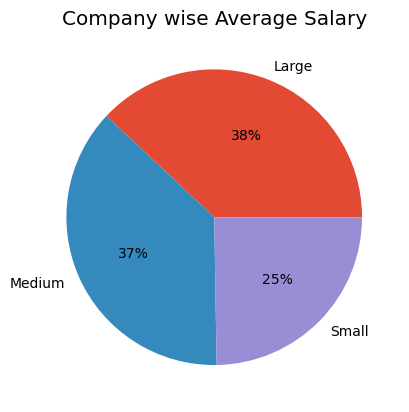

In [22]:
comp = df.groupby('company_size').agg({'salary_in_usd' : 'mean'}).reset_index()
comp['salary_in_usd'] = comp['salary_in_usd'].astype(int)
display(comp)

label = ['Large', 'Medium' , 'Small']
plt.pie(comp['salary_in_usd'], labels = label, autopct= '%.0f%%')
plt.title('Company wise Average Salary')
plt.show()

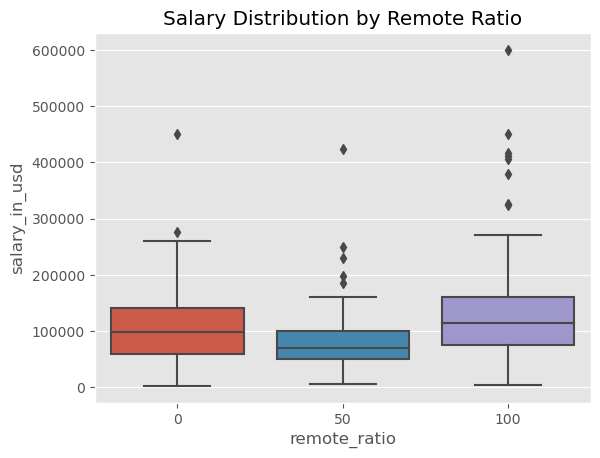

In [25]:
sns.boxplot(data = df, x = 'remote_ratio', y ='salary_in_usd')
plt.title('Salary Distribution by Remote Ratio')
plt.show()

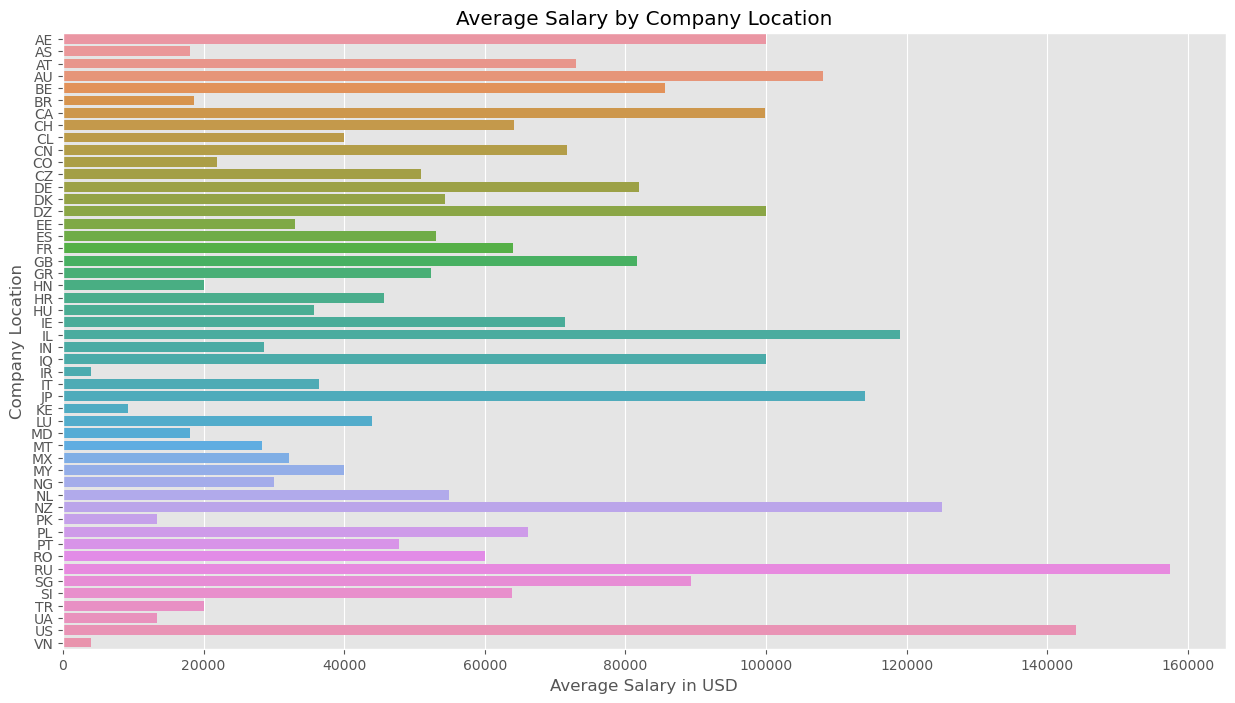

In [33]:
average_salary_by_location = df.groupby('company_location')['salary_in_usd'].mean().reset_index()
data = average_salary_by_location['company_location'].value_counts()

plt.figure(figsize=(15, 8))
sns.barplot(data = average_salary_by_location, x = 'salary_in_usd', y = 'company_location')
plt.title('Average Salary by Company Location')
plt.xlabel('Average Salary in USD')
plt.ylabel('Company Location')
plt.show()

C:\Users\yashika\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\yashika\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


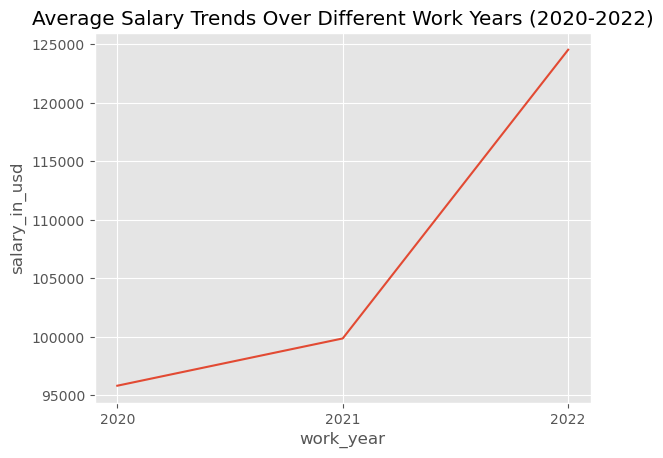

In [45]:
avg_salary = df.groupby('work_year')['salary_in_usd'].mean().reset_index()
sns.lineplot(data = avg_sal, x = 'work_year', y='salary_in_usd')
plt.title('Average Salary Trends Over Different Work Years (2020-2022)')
plt.xticks(avg_salary['work_year'])
plt.show()

C:\Users\yashika\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\yashika\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


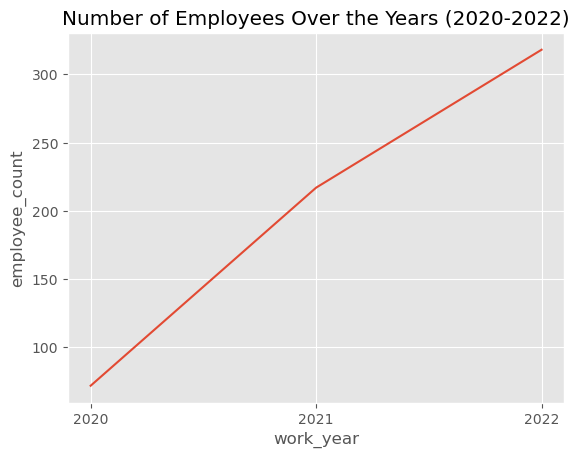

In [46]:
employee_count_by_year = df['work_year'].value_counts().sort_index().reset_index()
employee_count_by_year.columns = ['work_year', 'employee_count']

sns.lineplot(x='work_year', y='employee_count', data=employee_count_by_year)
plt.title('Number of Employees Over the Years (2020-2022)')
plt.xticks(employee_count_by_year['work_year']) 
plt.show()

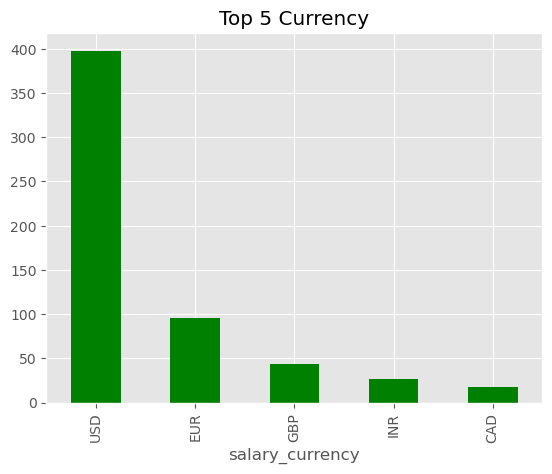

In [56]:
df["salary_currency"].value_counts().head().plot(kind='bar',color='green')
plt.title('Top 5 Currency')
plt.show()

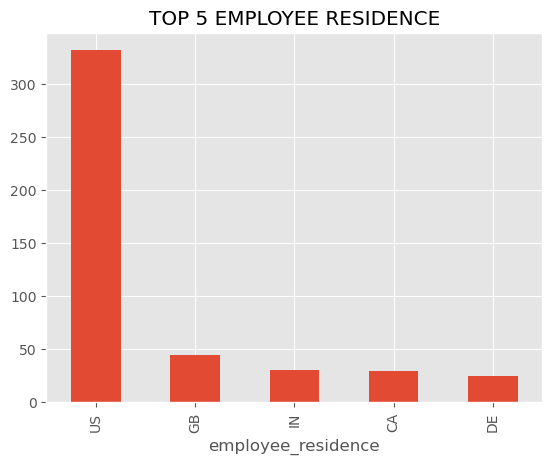

In [53]:
df['employee_residence'].value_counts().head().plot(kind='bar')
plt.title('TOP 5 EMPLOYEE RESIDENCE')
plt.show()